# Distributed Machine Learing Project

## Loading Libraries

In [1]:
# Importing Libraries



# Basic Libraries #################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns




# For Feature Engineering #########################################################################################

# For Plotting Correlation Matrix and Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# PCA - Need the sklearn PCA 
from sklearn.decomposition import PCA

# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler



# For Machine Learning Techniques #################################################################################

# For Data Anaylsis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# For Linear Regression
from sklearn.linear_model import LinearRegression

# ElasticNet Regression
from sklearn.linear_model import ElasticNet

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# For KNN 
from sklearn.neighbors import KNeighborsRegressor

# For Metrics
from sklearn.metrics import mean_squared_error, r2_score, max_error



# Personal Preference #############################################################################################
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
# Select dataset below

dataset_file = "C:/Users/prest/OneDrive - Mississippi State University/ML_Project_FA2021/Project Data/vehicles/vehicles.csv"
#dataset_file = "C:/Users/dhful/OneDrive - Mississippi State University/FA2021/ML_Project_FA2021/Project Data/vehicles/vehicles.csv"

In [3]:
# Uploading dataset as a Pandas file

df_pd = pd.read_csv(dataset_file)

df_pd.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


## Data Analysis

In [4]:
# Basic Analysis

pd.DataFrame(df_pd.describe())

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [5]:
# Data Types

pd.DataFrame(df_pd.dtypes, columns = ['Data Types'])

,Data Types
id,int64
url,object
region,object
region_url,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object


In [6]:
# Size of Dataset

df_pd.shape

(426880, 26)

In [7]:
# Cardinality

card = df_pd.apply(pd.Series.nunique)
pd.DataFrame(card, columns = ['Cardinality'])

,Cardinality
id,426880
url,426880
region,404
region_url,413
price,15655
year,114
manufacturer,42
model,29667
condition,6
cylinders,8


In [8]:
# Missing Values

sum_missing = df_pd.isna().sum()
pct_missing = df_pd.isna().mean()

missing_values = pd.concat([sum_missing, pct_missing], axis = 1)
missing_values = missing_values.reset_index(drop = False)
missing_values = missing_values.rename(columns = {0: 'Number of Missing Values',
                                                                                      1: 'Missing Percentage'})
missing_values

,index,Number of Missing Values,Missing Percentage
0,id,0,0.000000
1,url,0,0.000000
2,region,0,0.000000
3,region_url,0,0.000000
4,price,0,0.000000
5,year,1205,0.002823
6,manufacturer,17646,0.041337
7,model,5277,0.012362
8,condition,174104,0.407852
9,cylinders,177678,0.416225


## Feature Engineering

In [9]:
# Removing Columns containing too many Missing Values

df_pd2 = df_pd

th = .10
# Defining threshold for cutoff percentage

bad_column = []
for i,r in missing_values.iterrows():
        c = r['index']
        mp = r["Missing Percentage"]
        if mp > th:
            bad_column.append(c)

for i in bad_column:
    for j in df_pd2.columns:
        if j == i:
            df_pd2 = df_pd2.drop(j, axis = 1)
            
print(len(df_pd2.columns))
pd.DataFrame(df_pd2.columns)

18


,0
0,id
1,url
2,region
3,region_url
4,price
5,year
6,manufacturer
7,model
8,fuel
9,odometer


In [10]:
# Manually Removing Features that do not provide relevant information

df_pd3 = df_pd2.drop(['url','region_url','image_url','description','id'], axis = 1)

# Dropping the first couple rows since they have alot of Missing Data
df_pd3 = df_pd3.iloc[27:]
df_pd3 = df_pd3.reset_index()

df_pd3.head(5)

,index,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,lat,long,posting_date
0,27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,28,auburn,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,30,auburn,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,31,auburn,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [11]:
# String Indexer


from sklearn.preprocessing import LabelEncoder
cat_columns = df_pd3.select_dtypes(['object'])
cat_columns

#Convert from object type to cat type
for i in cat_columns:
    df_pd3[i] = df_pd3[i].astype('category')

# COnvert to Encoded values
from sklearn.preprocessing import LabelEncoder
cat_columns = df_pd3.select_dtypes(['category'])

LE = LabelEncoder()
for i in cat_columns:
    df_pd3[i] = LE.fit_transform(df_pd3[i])
    
df_pd3

#df_pd3[cat_columns] = df_pd3[cat_columns].apply(LabelEncoder().fit_transform)
#df_pd3[cat_columns] = df_pd3[cat_columns].apply(pd.to_numeric)
#df_pd3[cat_columns]

,index,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,lat,long,posting_date
0,27,16,33590,2014.0,14,24359,2,57923.0,0,2,1,32.590000,-85.480000,369847
1,28,16,22590,2010.0,7,24760,2,71229.0,0,2,1,32.590000,-85.480000,369828
2,29,16,39590,2020.0,7,24807,2,19160.0,0,2,1,32.590000,-85.480000,369861
3,30,16,30990,2017.0,39,27868,2,41124.0,0,2,1,32.590000,-85.480000,365051
4,31,16,15000,2013.0,13,14531,2,128000.0,0,0,1,32.592000,-85.518900,342285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426848,426875,397,23590,2019.0,31,19778,2,32226.0,0,2,50,33.786500,-84.445400,46
426849,426876,397,30590,2020.0,41,23652,2,12029.0,0,2,50,33.786500,-84.445400,45
426850,426877,397,34990,2020.0,6,29347,0,4174.0,0,2,50,33.779214,-84.411811,44
426851,426878,397,28990,2018.0,23,13498,2,30112.0,0,2,50,33.786500,-84.445400,43


In [12]:
# Filling in Missing Values

df_pd4 = df_pd3.fillna(df_pd3.mean())

#df_pd3.mean()
df_pd4.head(10)

,index,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,lat,long,posting_date
0,27,16,33590,2014.0,14,24359,2,57923.0,0,2,1,32.5900,-85.480000,369847
1,28,16,22590,2010.0,7,24760,2,71229.0,0,2,1,32.5900,-85.480000,369828
2,29,16,39590,2020.0,7,24807,2,19160.0,0,2,1,32.5900,-85.480000,369861
3,30,16,30990,2017.0,39,27868,2,41124.0,0,2,1,32.5900,-85.480000,365051
4,31,16,15000,2013.0,13,14531,2,128000.0,0,0,1,32.5920,-85.518900,342285
5,32,16,27990,2012.0,14,24489,2,68696.0,0,2,1,32.5900,-85.480000,341586
6,33,16,34590,2016.0,7,24820,2,29499.0,0,2,1,32.5900,-85.480000,339250
7,34,16,35000,2019.0,39,26358,2,43000.0,0,0,1,32.6013,-85.443974,337962
8,35,16,29990,2016.0,7,11026,2,17302.0,0,2,1,32.5900,-85.480000,336003
9,36,16,38590,2011.0,7,11462,2,30237.0,0,2,1,32.5900,-85.480000,327030


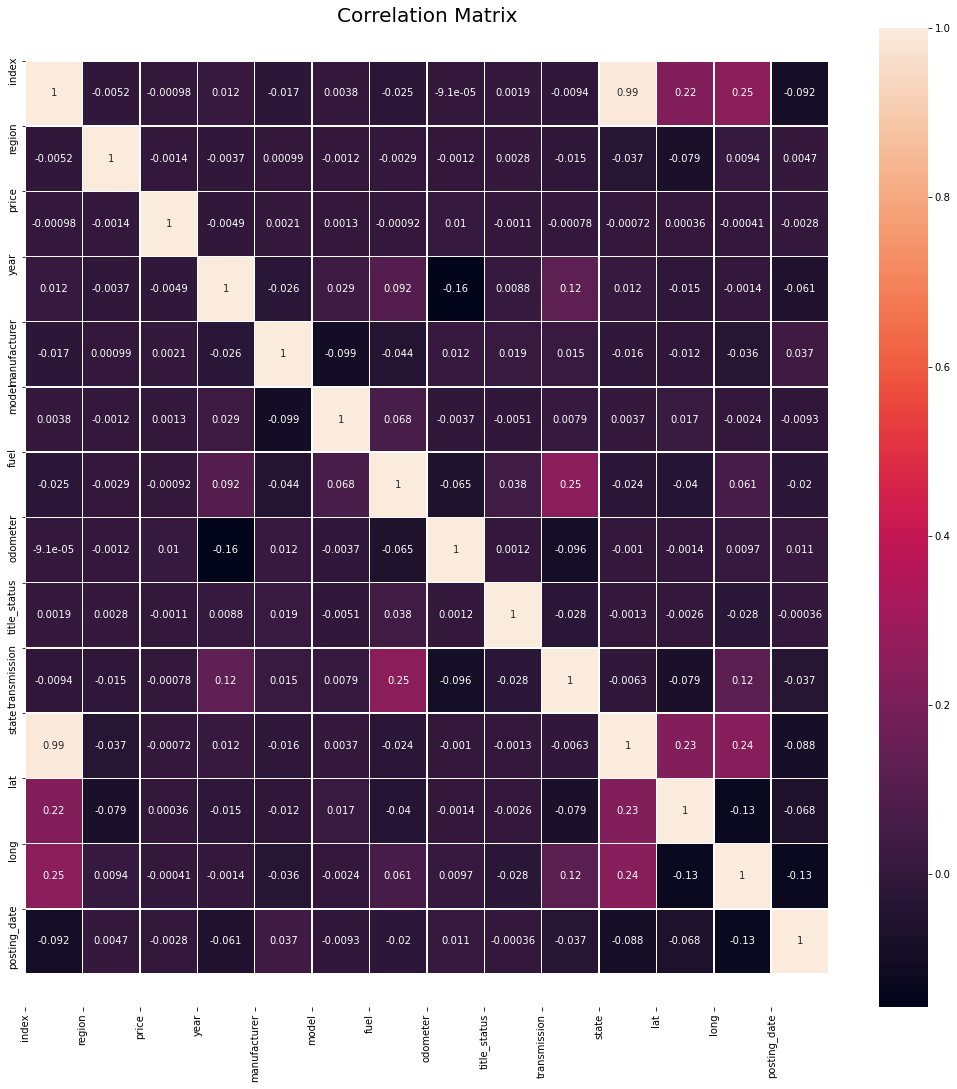

In [13]:
# Heat Map

fr_hm = df_pd4 #For Heat Map

## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = fr_hm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))

#Plotting heat map
g=sns.heatmap(fr_hm[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
plt.xticks(range(len(fr_hm.columns)), fr_hm.columns, rotation=90)
plt.yticks(range(len(fr_hm.columns)), fr_hm.columns)
plt.gca().xaxis.tick_bottom()
plt.show()

In [14]:
# Splitting the Data

target_variable_name = 'price'

# Setting the pre-proccessed dataframe
df_datasplit = df_pd4

X = df_datasplit.drop(target_variable_name, axis = 1)
y = df_datasplit[target_variable_name]


## Machine Learning Techniques

### Splitting the Data

In [15]:
# Splitting the Data


target_variable_name = 'price'

# Setting the pre-proccessed dataframe
df_datasplit = df_pd4

X = df_datasplit.drop(target_variable_name, axis = 1)
y = df_datasplit[target_variable_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
# Creating Results List


Train_score = []
Test_score = []
r2 = []
MSE = []
ME = []

### Simple Linear Regression

In [25]:
# Simple Linear Regression


import time
start_time = time.time()

# Running Model
lregressor1 = LinearRegression()
lregressor1.fit(X_train, y_train)

# Predicting
y_pred_LR = lregressor1.predict(X_test)

stop_time = time.time() - start_time
print(stop_time)

0.1041715145111084


In [26]:
# Results for Simple Linear Regression


r2_LR = r2_score(y_test,y_pred_LR) 
r2.append(r2_LR)

MSE_LR = mean_squared_error(y_test, y_pred_LR)
MSE.append(MSE_LR)

ME_LR = max_error(y_test, y_pred_LR)
ME.append(ME_LR)


Train_Score_LR = lregressor1.score(X_train,y_train)*100
Train_score.append(Train_Score_LR)
print("Trainning Score is {}".format(Train_Score_LR))

Test_Score_LR = lregressor1.score(X_test,y_test)*100
Test_score.append(Test_Score_LR)
print("Testing Score is {}".format(Test_Score_LR))

Trainning Score is 0.003601586998824846
Testing Score is 0.0015774379860555854


### Elastic Net Linear Regression

In [27]:
# Elastic Net


import time
start_time = time.time()

# Running Model
elasticnetregressor = ElasticNet()
elasticnetregressor.fit(X_train, y_train)

# Predicting
y_pred_EN = elasticnetregressor.predict(X_test)

stop_time = time.time() - start_time
print(stop_time)

2.8878018856048584


In [28]:
# Results for Elastic Net


r2_EN = r2_score(y_test,y_pred_EN) 
r2.append(r2_EN)

MSE_EN = mean_squared_error(y_test, y_pred_EN)
MSE.append(MSE_EN)

ME_EN = max_error(y_test, y_pred_EN)
ME.append(ME_EN)

Train_Score_EN = elasticnetregressor.score(X_train,y_train)*100
Train_score.append(Train_Score_EN)
print("Trainning Score is {}".format(Train_Score_EN))

Test_Score_EN = elasticnetregressor.score(X_test,y_test)*100
Test_score.append(Test_Score_EN)
print("Testing Score is {}".format(Test_Score_EN))

Trainning Score is 0.0035611388191414406
Testing Score is 0.0018127485675201171


### K-Nearest Neighbor Regressor

In [30]:
# Running K-Nearest Neighbors


import time
start_time = time.time()

# Running Model
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform')#‘distance’
knn.fit(X_train, y_train)
    
# Predicting
y_pred_KNN = knn.predict(X_test)

stop_time = time.time() - start_time
print(stop_time)

5.428564548492432


In [31]:
# Results for KNN


r2_KNN = r2_score(y_test,y_pred_KNN) 
r2.append(r2_EN)

MSE_KNN = mean_squared_error(y_test, y_pred_KNN)
MSE.append(MSE_KNN)

ME_KNN = max_error(y_test, y_pred_KNN)
ME.append(ME_KNN)


Train_Score_KNN = knn.score(X_train,y_train)*100
Train_score.append(Train_Score_KNN)
print("Trainning Score is {}".format(Train_Score_EN))

Test_Score_KNN = knn.score(X_test,y_test)*100
Test_score.append(Test_Score_KNN)
print("Testing Score is {}".format(Test_Score_KNN))

Trainning Score is 0.0035611388191414406
Testing Score is 0.38713419616794864


### Random Forest Regressor

In [32]:
# Random Forest (Max Depth = 5)


start_time = time.time()

# Running Model
RFRegressor = RandomForestRegressor(max_depth= 5, random_state=0)
RFRegressor.fit(X_train,y_train)

# Predicting
y_pred_RF = RFRegressor.predict(X_test)

stop_time = time.time() - start_time
print(stop_time)

93.49238324165344


In [34]:
# Results for Random Forest Regressor


r2_RF = r2_score(y_test,y_pred_RF) 
r2.append(r2_RF)

MSE_RF = mean_squared_error(y_test, y_pred_RF)
MSE.append(MSE_RF)

ME_RF = max_error(y_test, y_pred_RF)
ME.append(ME_RF)


Train_Score_RF = RFRegressor.score(X_train,y_train)*100
Train_score.append(Train_Score_RF)
print("Trainning Score is {}".format(Train_Score_RF))

Test_Score_RF = RFRegressor.score(X_test,y_test)*100
Test_score.append(Test_Score_RF)
print("Testing Score is {}".format(Test_Score_RF))

Trainning Score is 70.84937266513333
Testing Score is -10.150730921162076


## Analyzing Results

In [ ]:
print(r2)

In [ ]:
print(MSE)

In [ ]:
print(ME)

In [35]:
# Preparing Results

results_df_Train = pd.DataFrame(Train_score, columns = ['Training Scores'])
results_df_Test = pd.DataFrame(Test_score, columns = ['Test Scores'])


results_df = pd.concat([results_df_Test,results_df_Train], axis = 1)
results_df

,Test Scores,Training Scores
0,0.001577,0.003602
1,0.001813,0.003561
2,0.387134,5.878575
3,-10.150731,70.849373
